In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

file_path = '/content/drive/My Drive/Data/complaints.csv'
df = pd.read_csv(file_path, parse_dates=['Date received', 'Date sent to company'])

/tmp/ipython-input-7-2197903572.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['Date received', 'Date sent to company'])


In [8]:
print(df.head())
print(df.describe())
print(df.dtypes)
print(df.isna().sum())
print(df.shape)

  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1       

In [10]:
print(df['Product'].unique())

['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


In [11]:
# Filter for target products
products = [
    'Credit card',
    'Payday loan, title loan, personal loan, or advance loan',
    'Payday loan, title loan, or personal loan',
    'Checking or savings account',
    'Money transfers',
    'Money transfer, virtual currency, or money service'
]

df = df[df['Product'].isin(products)]
print(df['Product'].unique())

['Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Payday loan, title loan, personal loan, or advance loan'
 'Payday loan, title loan, or personal loan' 'Money transfers']


In [13]:
# Remove empty narratives
df = df[df['Consumer complaint narrative'].notnull()]
print(f"Remaining after removing empty narratives: {len(df)}")

Remaining after removing empty narratives: 345805


95th percentile word count: 577.0


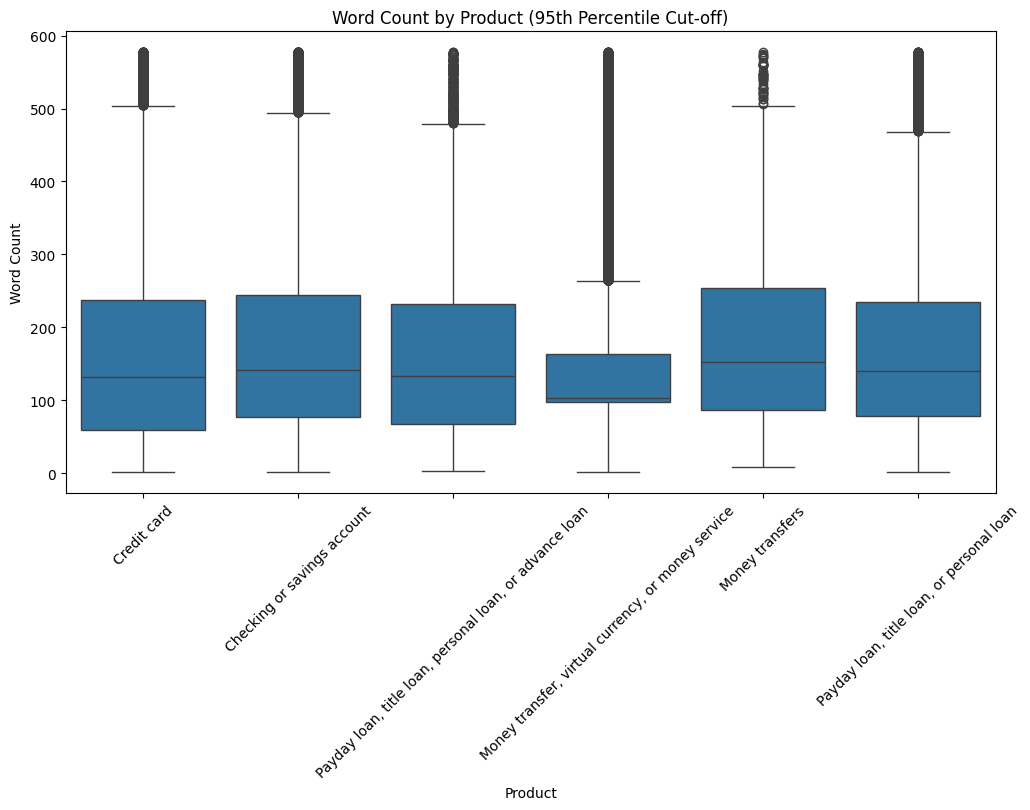

In [16]:
# Word count of narratives by product plot

df['word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate 95th percentile
q95 = df['word_count'].quantile(0.95)
print(f"95th percentile word count: {q95}")

# Filter to only rows below or equal to 95th percentile
df_trimmed = df[df['word_count'] <= q95]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trimmed, x='Product', y='word_count')
plt.title('Word Count by Product (95th Percentile Cut-off)')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Word Count')
plt.show()

In [17]:
# Clean the text on narratives

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['cleaned_narrative'] = df['Consumer complaint narrative'].apply(clean_text)

In [18]:
df.to_csv('../data/processed/filtered_complaints.csv', index=False)